# 시각화

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline 

# 한글 문제 해결
# matplotlib의 기본폰트에서 한글이 지원되지 않음
# 시스템별로 한글 지원하는 폰트로 변경해야 함
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [3]:
df = pd.read_csv("data/final_data.csv")

In [4]:
df = df.iloc[:, 1:]

In [5]:
df

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,05-16,14,일
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,05-16,15,일
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0.0,0.0,1.0,1.0,NaN,NaN,NaN,05-16,15,일
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,05-16,15,일
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,1.0,0.0,0.0,1.0,NaN,NaN,NaN,05-16,16,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2021-05-16 23:00:00,남자,청년,충청도,행복,한식,양식,일식,17.1,0.4,...,1.0,0.0,1.0,0.0,NaN,NaN,NaN,05-16,23,일
147,2021-05-17 02:00:00,여자,청년,경상도,중립,한식,일식,양식,16.7,0.5,...,0.0,1.0,0.0,0.0,NaN,NaN,NaN,05-17,2,월
148,2021-05-17 07:00:00,남자,청소년,경상도,행복,분식,한식,양식,15.9,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05-17,7,월
149,2021-05-17 07:00:00,남자,청소년,경상도,중립,중식,양식,한식,15.9,0.2,...,NaN,NaN,NaN,NaN,0.0,1.0,0.0,05-17,7,월


### (1) 성별, 연령대에 따른 1순위 음식 분류

In [6]:
a1 = df.pivot_table("기온",
                    columns=["성별","연령대"],
                    index="1순위",
                    aggfunc="count")
a1

성별    남자               여자                
연령대  중장년    청년   청소년   노년  중장년    청년  청소년
1순위                                      
분식   NaN   1.0   7.0  NaN  NaN   4.0  1.0
양식   1.0   3.0  25.0  NaN  1.0   4.0  1.0
일식   NaN   7.0  19.0  NaN  NaN   3.0  NaN
중식   1.0   2.0   8.0  NaN  2.0   3.0  NaN
한식   5.0  20.0  17.0  1.0  4.0  11.0  NaN

<AxesSubplot:ylabel='1순위'>

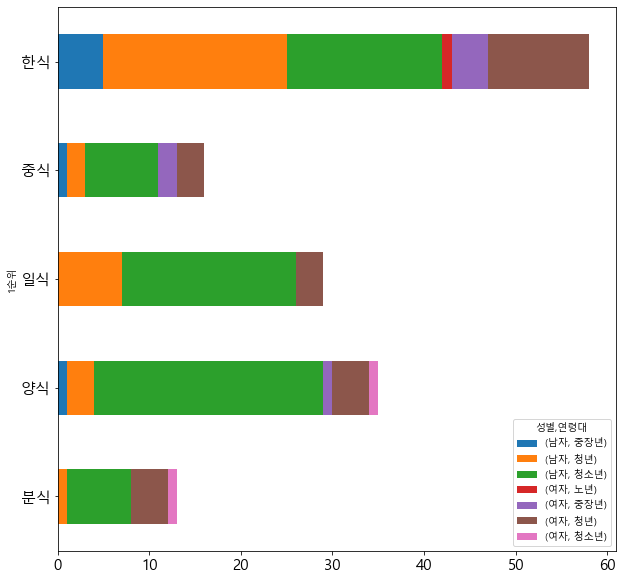

In [7]:
a1.plot(kind="barh", figsize=(10,10), fontsize=15, stacked=True)

### (2) 성별에 따른 메뉴 분포

In [8]:
df.columns

Index(['시간대', '성별', '연령대', '지역', '기분', '1순위', '2순위', '3순위', '기온', '강수량', '습도',
       '기압', '전운량', '불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥',
       '파스타', '스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕',
       '날짜', '시간', '요일'],
      dtype='object')

In [9]:
menu_list = ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥',
             '파스타', '스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕']

In [10]:
menu_list

['불고기',
 '냉면',
 '칼국수',
 '된장찌개',
 '비빔밥',
 '김치찌개',
 '떡볶이',
 '김밥',
 '파스타',
 '스테이크',
 '햄버거',
 '초밥',
 '우동',
 '메밀소바',
 '돈가스',
 '볶음밥',
 '짜장면',
 '짬뽕']

In [11]:
a2 = df.groupby('성별')[menu_list].sum().T
a2

성별,남자,여자
불고기,49.0,8.0
냉면,33.0,3.0
칼국수,27.0,7.0
된장찌개,35.0,10.0
비빔밥,36.0,13.0
김치찌개,40.0,8.0
떡볶이,29.0,20.0
김밥,12.0,7.0
파스타,31.0,15.0
스테이크,45.0,12.0


<AxesSubplot:>

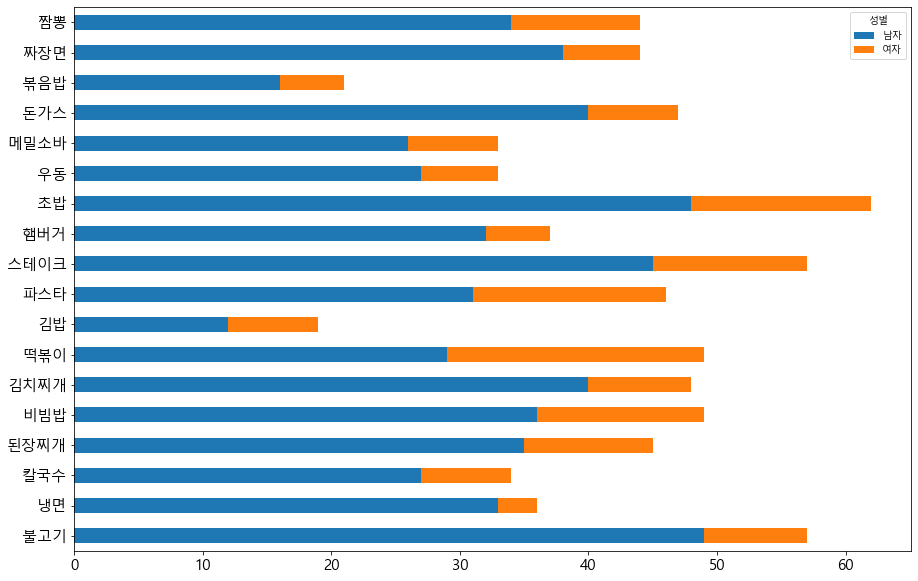

In [12]:
a2.plot(kind="barh", figsize=(15,10), fontsize=15, stacked=True)

### (3) 기분에 따른 메뉴 분포

In [13]:
a3 = df.groupby('기분')[menu_list].sum().T
a3

기분,분노,우울,중립,행복
불고기,3.0,10.0,22.0,22.0
냉면,3.0,6.0,13.0,14.0
칼국수,1.0,5.0,13.0,15.0
된장찌개,1.0,10.0,16.0,18.0
비빔밥,2.0,7.0,20.0,20.0
김치찌개,1.0,10.0,17.0,20.0
떡볶이,1.0,8.0,24.0,16.0
김밥,0.0,3.0,13.0,3.0
파스타,2.0,7.0,17.0,20.0
스테이크,4.0,12.0,19.0,22.0


In [14]:
a3['합계'] = a3.sum(axis=1)
a3 = a3.sort_values('합계', ascending=True)

In [15]:
a3 = a3.iloc[:, :-1]

<AxesSubplot:>

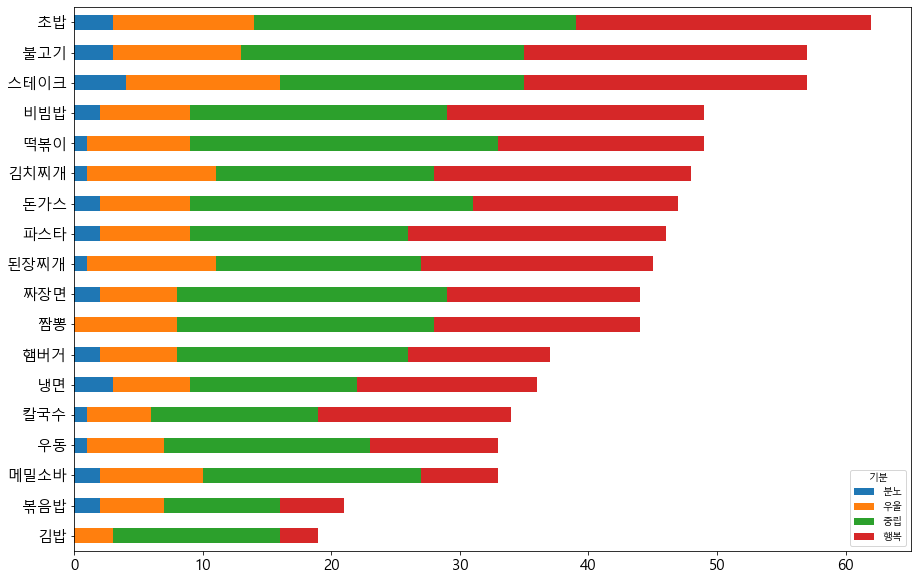

In [16]:
a3.plot(kind="barh", figsize=(15,10), fontsize=15, stacked=True)

### (4) 시간에 따른 메뉴

### (5) 연령에 따른 전체메뉴

In [17]:
df.columns
menu=['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥',
      '파스타', '스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕']
menu

['불고기',
 '냉면',
 '칼국수',
 '된장찌개',
 '비빔밥',
 '김치찌개',
 '떡볶이',
 '김밥',
 '파스타',
 '스테이크',
 '햄버거',
 '초밥',
 '우동',
 '메밀소바',
 '돈가스',
 '볶음밥',
 '짜장면',
 '짬뽕']

In [18]:
a5 = df.groupby(['연령대']).sum()[menu]
a5

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
연령대,,,,,,,,,,,,,,,,,,
노년,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
중장년,5.0,1.0,1.0,5.0,7.0,5.0,3.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,0.0,2.0,2.0,5.0
청년,23.0,11.0,13.0,17.0,22.0,20.0,23.0,9.0,18.0,21.0,12.0,26.0,10.0,16.0,21.0,8.0,14.0,15.0
청소년,29.0,24.0,20.0,22.0,19.0,23.0,23.0,8.0,24.0,31.0,24.0,31.0,21.0,13.0,26.0,11.0,28.0,24.0


<AxesSubplot:ylabel='연령대'>

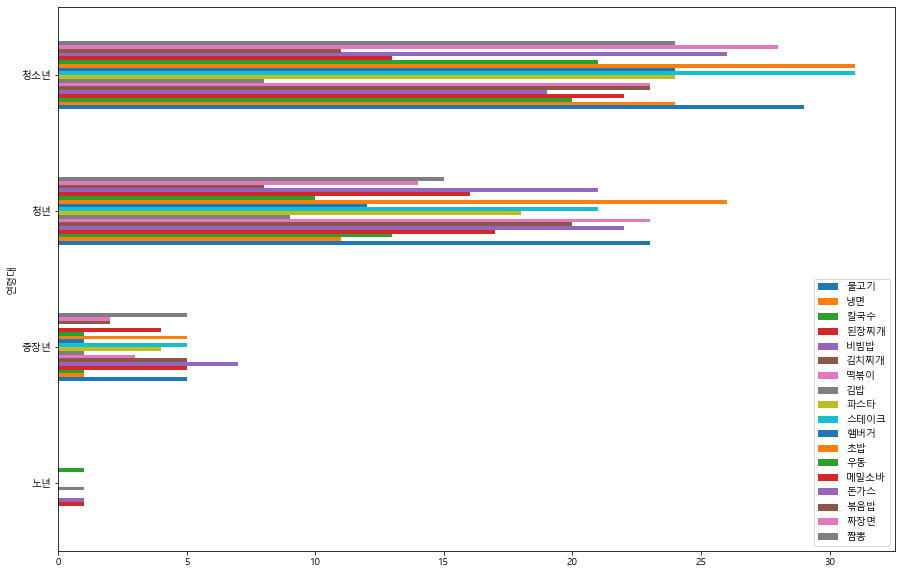

In [19]:
a5.plot(kind='barh', figsize=(15,10))